In [2]:
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.svm import SVC
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score,cross_val_predict
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns

In [3]:
df_train_test=pd.read_excel("Final_Train.xlsx")


In [4]:
df_train_test.shape

(5961, 7)

In [5]:
df_train_test.head(10)

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
5,BAMS,8 years experience,NaN,"Porur, Chennai",Ayurveda,NaN,100
6,BHMS,42 years experience,NaN,"Karol Bagh, Delhi",Homeopath,NaN,200
7,BDS,10 years experience,99%,"Arekere, Bangalore",Dentist,Dental Fillings Crowns and Bridges Fixing Impa...,200
8,"MBBS, MD - General Medicine",14 years experience,NaN,"Old City, Hyderabad",General Medicine,NaN,100
9,"BSc, BDS",23 years experience,NaN,"Athani, Ernakulam",Dentist,NaN,100


In [6]:
df_train_test['Qualification1'] = df_train_test['Qualification'].str.split(',').str[0]

In [7]:
df_train_test['Qualification2'] = df_train_test['Qualification'].str.split(',').str[1]

In [8]:
df_train_test['Qualification3'] = df_train_test['Qualification'].str.split(',').str[2]

In [9]:
df_train_test.head(10)

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Qualification1,Qualification2,Qualification3
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,BHMS,MD - Homeopathy,NaN
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,BAMS,MD - Ayurveda Medicine,NaN
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,MBBS,MS - Otorhinolaryngology,NaN
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,BSc - Zoology,BAMS,NaN
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,BAMS,NaN,NaN
5,BAMS,8 years experience,NaN,"Porur, Chennai",Ayurveda,NaN,100,BAMS,NaN,NaN
6,BHMS,42 years experience,NaN,"Karol Bagh, Delhi",Homeopath,NaN,200,BHMS,NaN,NaN
7,BDS,10 years experience,99%,"Arekere, Bangalore",Dentist,Dental Fillings Crowns and Bridges Fixing Impa...,200,BDS,NaN,NaN
8,"MBBS, MD - General Medicine",14 years experience,NaN,"Old City, Hyderabad",General Medicine,NaN,100,MBBS,MD - General Medicine,NaN
9,"BSc, BDS",23 years experience,NaN,"Athani, Ernakulam",Dentist,NaN,100,BSc,BDS,NaN


In [10]:
df_train_test.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
Qualification1           0
Qualification2        1962
Qualification3        4590
dtype: int64

In [11]:
df_train_test['Experience'] = df_train_test['Experience'].str.slice(stop=2).astype(int)

In [12]:
df_train_test.head(10)

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Qualification1,Qualification2,Qualification3
0,"BHMS, MD - Homeopathy",24,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,BHMS,MD - Homeopathy,NaN
1,"BAMS, MD - Ayurveda Medicine",12,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,BAMS,MD - Ayurveda Medicine,NaN
2,"MBBS, MS - Otorhinolaryngology",9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,MBBS,MS - Otorhinolaryngology,NaN
3,"BSc - Zoology, BAMS",12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,BSc - Zoology,BAMS,NaN
4,BAMS,20,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,BAMS,NaN,NaN
5,BAMS,8,NaN,"Porur, Chennai",Ayurveda,NaN,100,BAMS,NaN,NaN
6,BHMS,42,NaN,"Karol Bagh, Delhi",Homeopath,NaN,200,BHMS,NaN,NaN
7,BDS,10,99%,"Arekere, Bangalore",Dentist,Dental Fillings Crowns and Bridges Fixing Impa...,200,BDS,NaN,NaN
8,"MBBS, MD - General Medicine",14,NaN,"Old City, Hyderabad",General Medicine,NaN,100,MBBS,MD - General Medicine,NaN
9,"BSc, BDS",23,NaN,"Athani, Ernakulam",Dentist,NaN,100,BSc,BDS,NaN


In [13]:
df_train_test['Rating'].fillna('0%',inplace = True) # need to change because it is having null value and not allowing to eliminate the %

In [14]:
df_train_test.head(10)

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Qualification1,Qualification2,Qualification3
0,"BHMS, MD - Homeopathy",24,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,BHMS,MD - Homeopathy,NaN
1,"BAMS, MD - Ayurveda Medicine",12,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,BAMS,MD - Ayurveda Medicine,NaN
2,"MBBS, MS - Otorhinolaryngology",9,0%,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,MBBS,MS - Otorhinolaryngology,NaN
3,"BSc - Zoology, BAMS",12,0%,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,BSc - Zoology,BAMS,NaN
4,BAMS,20,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,BAMS,NaN,NaN
5,BAMS,8,0%,"Porur, Chennai",Ayurveda,NaN,100,BAMS,NaN,NaN
6,BHMS,42,0%,"Karol Bagh, Delhi",Homeopath,NaN,200,BHMS,NaN,NaN
7,BDS,10,99%,"Arekere, Bangalore",Dentist,Dental Fillings Crowns and Bridges Fixing Impa...,200,BDS,NaN,NaN
8,"MBBS, MD - General Medicine",14,0%,"Old City, Hyderabad",General Medicine,NaN,100,MBBS,MD - General Medicine,NaN
9,"BSc, BDS",23,0%,"Athani, Ernakulam",Dentist,NaN,100,BSc,BDS,NaN


In [15]:
df_train_test['Rating'] = df_train_test['Rating'].str.slice(stop=-1).astype(int)

In [16]:
df_train_test.head(10)

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Qualification1,Qualification2,Qualification3
0,"BHMS, MD - Homeopathy",24,100,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,BHMS,MD - Homeopathy,NaN
1,"BAMS, MD - Ayurveda Medicine",12,98,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,BAMS,MD - Ayurveda Medicine,NaN
2,"MBBS, MS - Otorhinolaryngology",9,0,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,MBBS,MS - Otorhinolaryngology,NaN
3,"BSc - Zoology, BAMS",12,0,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,BSc - Zoology,BAMS,NaN
4,BAMS,20,100,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,BAMS,NaN,NaN
5,BAMS,8,0,"Porur, Chennai",Ayurveda,NaN,100,BAMS,NaN,NaN
6,BHMS,42,0,"Karol Bagh, Delhi",Homeopath,NaN,200,BHMS,NaN,NaN
7,BDS,10,99,"Arekere, Bangalore",Dentist,Dental Fillings Crowns and Bridges Fixing Impa...,200,BDS,NaN,NaN
8,"MBBS, MD - General Medicine",14,0,"Old City, Hyderabad",General Medicine,NaN,100,MBBS,MD - General Medicine,NaN
9,"BSc, BDS",23,0,"Athani, Ernakulam",Dentist,NaN,100,BSc,BDS,NaN


In [17]:
df_train_test['Locality'] = df_train_test['Place'].str.split(',').str[0]

In [18]:
df_train_test['City'] = df_train_test['Place'].str.split(',').str[1]

In [19]:
df_train_test.head(10)

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Qualification1,Qualification2,Qualification3,Locality,City
0,"BHMS, MD - Homeopathy",24,100,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,BHMS,MD - Homeopathy,NaN,Kakkanad,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,98,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,BAMS,MD - Ayurveda Medicine,NaN,Whitefield,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9,0,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,MBBS,MS - Otorhinolaryngology,NaN,Mathikere - BEL,Bangalore
3,"BSc - Zoology, BAMS",12,0,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,BSc - Zoology,BAMS,NaN,Bannerghatta Road,Bangalore
4,BAMS,20,100,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,BAMS,NaN,NaN,Keelkattalai,Chennai
5,BAMS,8,0,"Porur, Chennai",Ayurveda,NaN,100,BAMS,NaN,NaN,Porur,Chennai
6,BHMS,42,0,"Karol Bagh, Delhi",Homeopath,NaN,200,BHMS,NaN,NaN,Karol Bagh,Delhi
7,BDS,10,99,"Arekere, Bangalore",Dentist,Dental Fillings Crowns and Bridges Fixing Impa...,200,BDS,NaN,NaN,Arekere,Bangalore
8,"MBBS, MD - General Medicine",14,0,"Old City, Hyderabad",General Medicine,NaN,100,MBBS,MD - General Medicine,NaN,Old City,Hyderabad
9,"BSc, BDS",23,0,"Athani, Ernakulam",Dentist,NaN,100,BSc,BDS,NaN,Athani,Ernakulam


In [20]:
df_train_test=df_train_test.drop(df_train_test[['Place','Qualification']],axis=1)

In [21]:
df_train_test.head(10)

,Experience,Rating,Profile,Miscellaneous_Info,Fees,Qualification1,Qualification2,Qualification3,Locality,City
0,24,100,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,BHMS,MD - Homeopathy,NaN,Kakkanad,Ernakulam
1,12,98,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,BAMS,MD - Ayurveda Medicine,NaN,Whitefield,Bangalore
2,9,0,ENT Specialist,NaN,300,MBBS,MS - Otorhinolaryngology,NaN,Mathikere - BEL,Bangalore
3,12,0,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,BSc - Zoology,BAMS,NaN,Bannerghatta Road,Bangalore
4,20,100,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,BAMS,NaN,NaN,Keelkattalai,Chennai
5,8,0,Ayurveda,NaN,100,BAMS,NaN,NaN,Porur,Chennai
6,42,0,Homeopath,NaN,200,BHMS,NaN,NaN,Karol Bagh,Delhi
7,10,99,Dentist,Dental Fillings Crowns and Bridges Fixing Impa...,200,BDS,NaN,NaN,Arekere,Bangalore
8,14,0,General Medicine,NaN,100,MBBS,MD - General Medicine,NaN,Old City,Hyderabad
9,23,0,Dentist,NaN,100,BSc,BDS,NaN,Athani,Ernakulam


In [22]:
df_train_test['Ms'] = df_train_test['Miscellaneous_Info'].str.split('%').str[0]
df_train_test['Mlen'] = df_train_test['Ms'].str.len()
df_train_test.loc[df_train_test['Mlen']>3, 'Ms'] = 0
df_train_test['Ms'].fillna(0,inplace = True)
df_train_test['Ms'] = df_train_test['Ms'].astype(int)
df_train_test['Ms2'] = df_train_test['Miscellaneous_Info'].str.split('% ').str[1]

df_train_test['Ms3'] = df_train_test['Ms2'].str.split(' ').str[0]

df_train_test['Ms3'].fillna(0,inplace = True)
df_train_test['Ms2'] = df_train_test['Ms2'].str.split(',').str[0]
df_train_test['Mlen3'] = df_train_test['Ms3'].str.len()
df_train_test.loc[df_train_test['Mlen3']>3, 'Ms3'] = 0
df_train_test.loc[df_train_test['Ms3']==',', 'Ms3'] = 0
df_train_test['Ms3'] = df_train_test['Ms3'].astype(int)

In [23]:
df_train_test.head(10)

,Experience,Rating,Profile,Miscellaneous_Info,Fees,Qualification1,Qualification2,Qualification3,Locality,City,Ms,Mlen,Ms2,Ms3,Mlen3
0,24,100,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,BHMS,MD - Homeopathy,NaN,Kakkanad,Ernakulam,100,3.0,16 Feedback Kakkanad,16,2.0
1,12,98,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,BAMS,MD - Ayurveda Medicine,NaN,Whitefield,Bangalore,98,2.0,76 Feedback Whitefield,76,2.0
2,9,0,ENT Specialist,NaN,300,MBBS,MS - Otorhinolaryngology,NaN,Mathikere - BEL,Bangalore,0,NaN,NaN,0,NaN
3,12,0,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,BSc - Zoology,BAMS,NaN,Bannerghatta Road,Bangalore,0,58.0,NaN,0,NaN
4,20,100,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,BAMS,NaN,NaN,Keelkattalai,Chennai,100,3.0,4 Feedback Keelkattalai,4,1.0
5,8,0,Ayurveda,NaN,100,BAMS,NaN,NaN,Porur,Chennai,0,NaN,NaN,0,NaN
6,42,0,Homeopath,NaN,200,BHMS,NaN,NaN,Karol Bagh,Delhi,0,NaN,NaN,0,NaN
7,10,99,Dentist,Dental Fillings Crowns and Bridges Fixing Impa...,200,BDS,NaN,NaN,Arekere,Bangalore,0,79.0,NaN,0,NaN
8,14,0,General Medicine,NaN,100,MBBS,MD - General Medicine,NaN,Old City,Hyderabad,0,NaN,NaN,0,NaN
9,23,0,Dentist,NaN,100,BSc,BDS,NaN,Athani,Ernakulam,0,NaN,NaN,0,NaN


In [24]:
df_train_test = df_train_test.drop(df_train_test[['Miscellaneous_Info','Mlen','Mlen3']], axis=1)


In [25]:
df_train_test.head(10)

,Experience,Rating,Profile,Fees,Qualification1,Qualification2,Qualification3,Locality,City,Ms,Ms2,Ms3
0,24,100,Homeopath,100,BHMS,MD - Homeopathy,NaN,Kakkanad,Ernakulam,100,16 Feedback Kakkanad,16
1,12,98,Ayurveda,350,BAMS,MD - Ayurveda Medicine,NaN,Whitefield,Bangalore,98,76 Feedback Whitefield,76
2,9,0,ENT Specialist,300,MBBS,MS - Otorhinolaryngology,NaN,Mathikere - BEL,Bangalore,0,NaN,0
3,12,0,Ayurveda,250,BSc - Zoology,BAMS,NaN,Bannerghatta Road,Bangalore,0,NaN,0
4,20,100,Ayurveda,250,BAMS,NaN,NaN,Keelkattalai,Chennai,100,4 Feedback Keelkattalai,4
5,8,0,Ayurveda,100,BAMS,NaN,NaN,Porur,Chennai,0,NaN,0
6,42,0,Homeopath,200,BHMS,NaN,NaN,Karol Bagh,Delhi,0,NaN,0
7,10,99,Dentist,200,BDS,NaN,NaN,Arekere,Bangalore,0,NaN,0
8,14,0,General Medicine,100,MBBS,MD - General Medicine,NaN,Old City,Hyderabad,0,NaN,0
9,23,0,Dentist,100,BSc,BDS,NaN,Athani,Ernakulam,0,NaN,0


In [26]:
df_train_test.shape

(5961, 12)

In [27]:
df_train_test.isnull().sum()

Experience           0
Rating               0
Profile              0
Fees                 0
Qualification1       0
Qualification2    1962
Qualification3    4590
Locality            25
City                26
Ms                   0
Ms2               4454
Ms3                  0
dtype: int64

In [28]:
df_train_test['Qualification2'].fillna("unknown",inplace = True)
df_train_test['Qualification3'].fillna("unknown",inplace = True)
df_train_test['Locality'].fillna("unknown",inplace = True)
df_train_test['City'].fillna("unknown",inplace = True)
df_train_test['Ms2'].fillna("unknown",inplace = True)


In [29]:
df_train_test.isnull().sum()

Experience        0
Rating            0
Profile           0
Fees              0
Qualification1    0
Qualification2    0
Qualification3    0
Locality          0
City              0
Ms                0
Ms2               0
Ms3               0
dtype: int64

In [30]:
df_train_test.head()

,Experience,Rating,Profile,Fees,Qualification1,Qualification2,Qualification3,Locality,City,Ms,Ms2,Ms3
0,24,100,Homeopath,100,BHMS,MD - Homeopathy,unknown,Kakkanad,Ernakulam,100,16 Feedback Kakkanad,16
1,12,98,Ayurveda,350,BAMS,MD - Ayurveda Medicine,unknown,Whitefield,Bangalore,98,76 Feedback Whitefield,76
2,9,0,ENT Specialist,300,MBBS,MS - Otorhinolaryngology,unknown,Mathikere - BEL,Bangalore,0,unknown,0
3,12,0,Ayurveda,250,BSc - Zoology,BAMS,unknown,Bannerghatta Road,Bangalore,0,unknown,0
4,20,100,Ayurveda,250,BAMS,unknown,unknown,Keelkattalai,Chennai,100,4 Feedback Keelkattalai,4


In [31]:
df_train_test.describe()

,Experience,Rating,Fees,Ms,Ms3
count,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000
mean,17.303976,42.217245,307.944640,23.556786,9.677906
std,11.142798,47.340934,190.920373,40.828486,39.358833
min,0.000000,0.000000,5.000000,0.000000,0.000000
25%,9.000000,0.000000,150.000000,0.000000,0.000000
50%,14.000000,0.000000,300.000000,0.000000,0.000000
75%,23.000000,96.000000,500.000000,56.000000,1.000000
max,66.000000,100.000000,950.000000,100.000000,854.000000


In [32]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df_train_test["Profile"] = lb.fit_transform(df_train_test["Profile"])
df_train_test["Qualification1"] = lb.fit_transform(df_train_test["Qualification1"])
df_train_test["Qualification2"] = lb.fit_transform(df_train_test["Qualification2"])
df_train_test["Qualification3"] = lb.fit_transform(df_train_test["Qualification3"])
df_train_test["City"] = lb.fit_transform(df_train_test["City"])
df_train_test["Locality"] = lb.fit_transform(df_train_test["Locality"])
df_train_test["Ms2"] = lb.fit_transform(df_train_test["Ms2"])

In [33]:
df_train_test.head()

,Experience,Rating,Profile,Fees,Qualification1,Qualification2,Qualification3,Locality,City,Ms,Ms2,Ms3
0,24,100,5,100,8,252,406,296,4,100,356,16
1,12,98,0,350,5,241,406,855,0,98,1265,76
2,9,0,3,300,79,334,406,452,0,0,1420,0
3,12,0,0,250,12,7,406,68,0,0,1420,0
4,20,100,0,250,5,426,406,335,1,100,895,4


In [34]:
df_train_test.describe()

,Experience,Rating,Profile,Fees,Qualification1,Qualification2,Qualification3,Locality,City,Ms,Ms2,Ms3
count,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000
mean,17.303976,42.217245,2.441872,307.944640,47.962087,288.075323,362.796175,412.804395,3.098977,23.556786,1239.831069,9.677906
std,11.142798,47.340934,1.658014,190.920373,39.371696,131.765907,99.497639,256.586353,2.350982,40.828486,372.269887,39.358833
min,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,0.000000,1.000000,150.000000,6.000000,227.000000,406.000000,195.000000,1.000000,0.000000,1403.000000,0.000000
50%,14.000000,0.000000,2.000000,300.000000,79.000000,293.000000,406.000000,409.000000,3.000000,0.000000,1420.000000,0.000000
75%,23.000000,96.000000,4.000000,500.000000,79.000000,426.000000,406.000000,626.000000,5.000000,56.000000,1420.000000,1.000000
max,66.000000,100.000000,5.000000,950.000000,150.000000,426.000000,406.000000,866.000000,9.000000,100.000000,1420.000000,854.000000


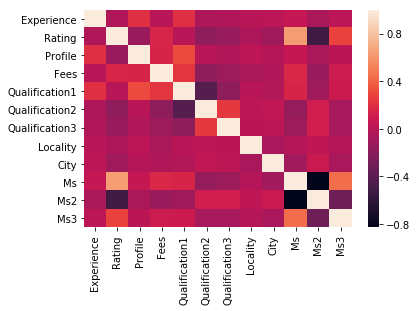

In [35]:

corr_heatmap=df_train_test.corr()
sns.heatmap(corr_heatmap)

In [36]:
train_y= df_train_test['Fees']

In [37]:
train_y.head()

0    100
1    350
2    300
3    250
4    250
Name: Fees, dtype: int64

In [39]:
train_x=df_train_test.drop(df_train_test[['Fees','Ms2']],axis=1)

In [40]:
train_x.head()


,Experience,Rating,Profile,Qualification1,Qualification2,Qualification3,Locality,City,Ms,Ms3
0,24,100,5,8,252,406,296,4,100,16
1,12,98,0,5,241,406,855,0,98,76
2,9,0,3,79,334,406,452,0,0,0
3,12,0,0,12,7,406,68,0,0,0
4,20,100,0,5,426,406,335,1,100,4


In [41]:
train_x.shape

(5961, 10)

In [42]:
train_y.shape

(5961,)

In [43]:
from sklearn.preprocessing import StandardScaler
scale =StandardScaler()
train_x=scale.fit_transform(train_x)

C:\Users\gsingh20\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\gsingh20\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [44]:
from sklearn.preprocessing import MinMaxScaler
scale =MinMaxScaler()
train_x=scale.fit_transform(train_x)

In [45]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
rfr=RandomForestRegressor(n_estimators=200)

In [46]:
print(cross_val_score(rfr,train_x,train_y,cv=9).mean())

0.1941117798909121


In [47]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.3, random_state=42)
lm=LinearRegression()
lm.fit(x_train, y_train)
lm.score(x_train, y_train)



0.09656668777206756